In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
fire_distances_csv = 'fire_distances.csv'
fire_distances_csv_path = r'C:\Users\clark.roll\python coding\code_personal\Data512_ProjectDataset'
csv_filepath = os.path.join(fire_distances_csv_path, fire_distances_csv)
distance_df = pd.read_csv(csv_filepath)

In [8]:
# Filter fires up to by mileage away for plots
distance_1800 = distance_df[distance_df['closest_distance_miles'] <= 1800]

distance_650  = distance_df[distance_df['closest_distance_miles'] <= 650]

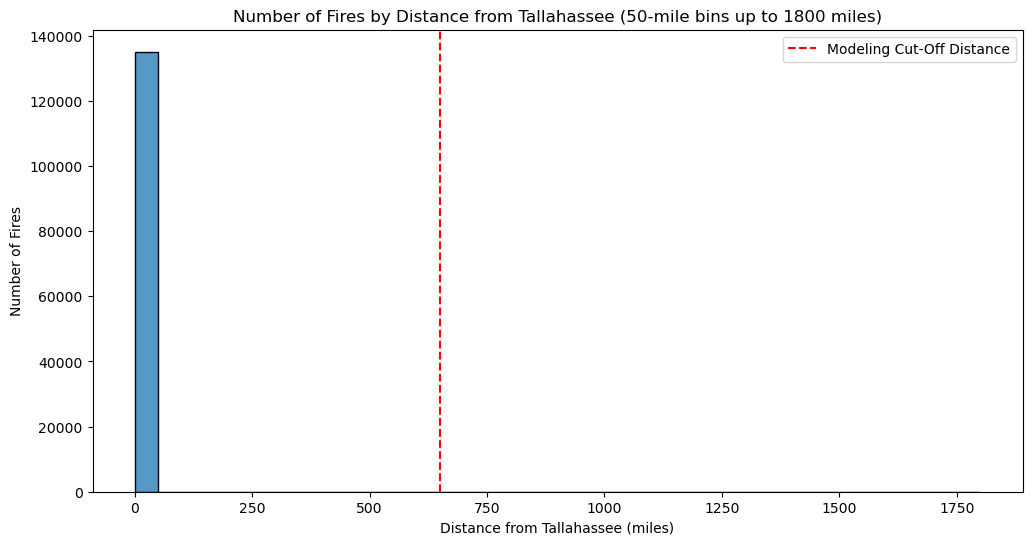

In [9]:
# Create 50-mile distance bins
bins = range(0, 1850, 50)  # Bins go from 0 to 1800 in increments of 50
distance_1800['distance_bin'] = pd.cut(distance_1800['closest_distance_miles'], bins=bins)

# Plot histogram
plt.figure(figsize=(12, 6))
sns.histplot(distance_1800, x='closest_distance_miles', bins=bins, kde=False)
plt.axvline(x=650, color='red', linestyle='--', label='Modeling Cut-Off Distance')
plt.xlabel('Distance from Tallahassee (miles)')
plt.ylabel('Number of Fires')
plt.title('Number of Fires by Distance from Tallahassee (50-mile bins up to 1800 miles)')
plt.legend()
plt.show()

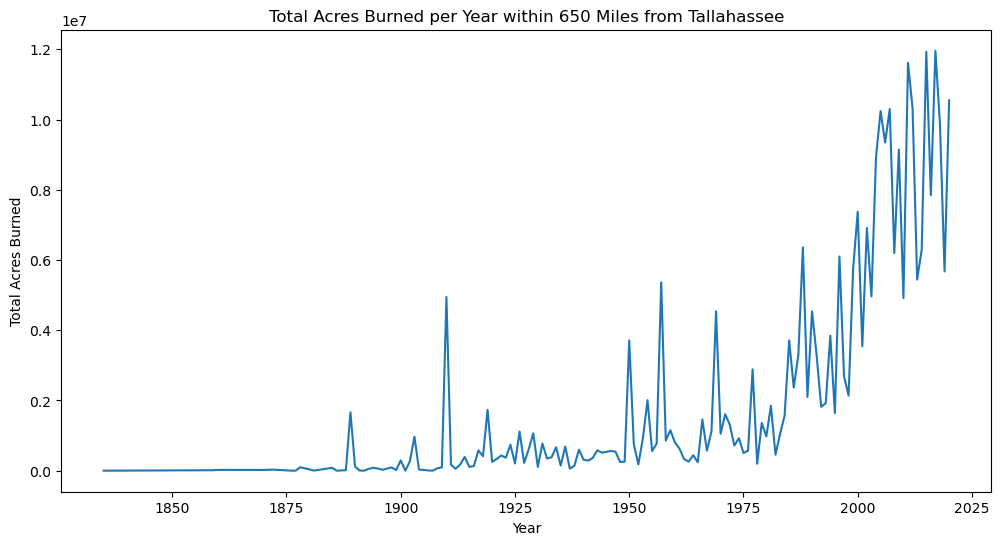

In [10]:
# Assuming 'fire_data' has 'Fire_Year' and 'GIS_Acres' columns

# Group by year to calculate total acres burned per year
total_acres_per_year = distance_650.groupby('Fire_Year')['GIS_Acres'].sum().reset_index()

# Plot time series of total acres burned per year
plt.figure(figsize=(12, 6))
sns.lineplot(data=total_acres_per_year, x='Fire_Year', y='GIS_Acres')
plt.xlabel('Year')
plt.ylabel('Total Acres Burned')
plt.title('Total Acres Burned per Year within 650 Miles from Tallahassee')
plt.show()